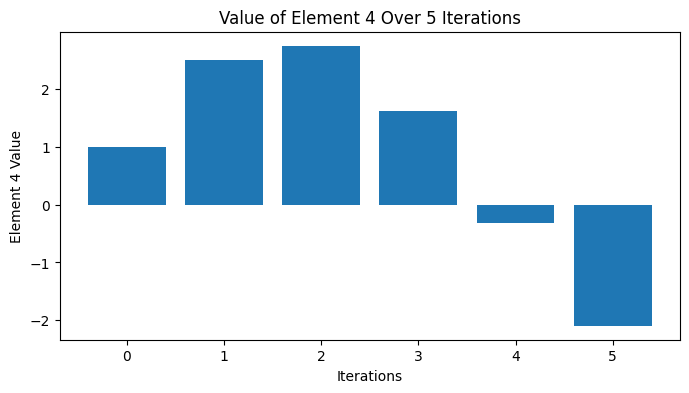

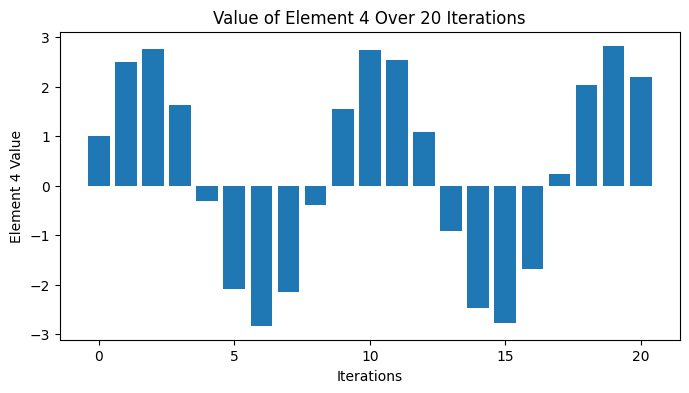

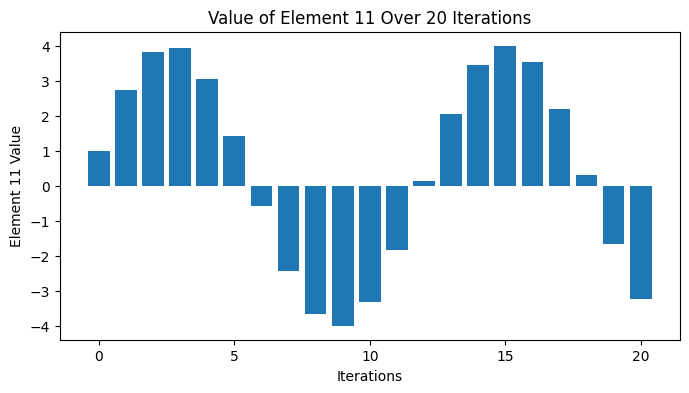

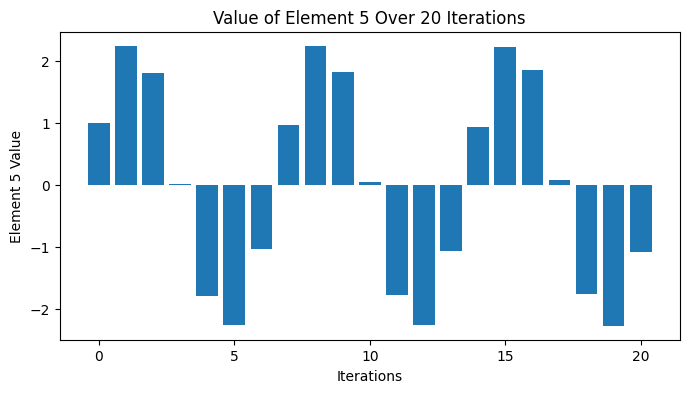

Step 1: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 2: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 3: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 4: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 5: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 6: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 7: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 8: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 9: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 10: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 11: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 12: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 13: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 14: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 15: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 16: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 17: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 18: Query Norm = 4.0000, Inversion Norm = 4.0000
Step 19: Query Norm = 4.0000, Inversi

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def query(elements, marked_elements):
    """ İşaretli öğelerin işaretini tersine çevirir (-1 ile çarpar). """
    for idx in marked_elements:
        elements[idx] *= -1
    return elements

def inversion(elements):
    """ Tüm öğeleri ortalama değer etrafında yansıtır. """
    mean_value = sum(elements) / len(elements)
    elements = [2 * mean_value - x for x in elements]
    return elements

def simulate_grover(N, marked_elements, track_index=None, steps=20):
    """ Grover algoritmasının klasik simülasyonunu gerçekleştirir. """
    elements = [1] * N
    iterations = []
    L = []

    # İlk değeri ekle
    if track_index is not None:
        iterations.append(0)
        L.append(elements[track_index])

    for step in range(steps):
        elements = query(elements, marked_elements)
        elements = inversion(elements)

        if track_index is not None:
            iterations.append(step + 1)
            L.append(elements[track_index])

    # Grafikleri çiz
    if track_index is not None:
        plt.figure(figsize=(8, 4))
        plt.bar(iterations, L)
        plt.xlabel("Iterations")
        plt.ylabel(f"Element {track_index + 1} Value")
        plt.title(f"Value of Element {track_index + 1} Over {steps} Iterations")
        plt.show()

    return elements

# ----- Senaryolar -----

# Görev 1: N=8, 4. eleman işaretli
simulate_grover(N=8, marked_elements=[3], track_index=3, steps=5)

# Görev 2: 20 adım için 4. elemanın değişimini takip et
simulate_grover(N=8, marked_elements=[3], track_index=3, steps=20)

# Görev 3: N=16, 11. eleman işaretli
simulate_grover(N=16, marked_elements=[10], track_index=10, steps=20)

# Görev 4: N=16, 5., 8. ve 10. eleman işaretli, 5. elemanı takip et
simulate_grover(N=16, marked_elements=[4, 7, 9], track_index=4, steps=20)

# Görev 5: N=16, ilk 4 eleman işaretli, vektör uzunluklarını takip et
N = 16
elements = [1] * N
marked_elements = [0, 1, 2, 3]

for step in range(20):
    elements = query(elements, marked_elements)
    norm_query = np.linalg.norm(elements)

    elements = inversion(elements)
    norm_inversion = np.linalg.norm(elements)

    print(f"Step {step+1}: Query Norm = {norm_query:.4f}, Inversion Norm = {norm_inversion:.4f}")

# Görev 6: N=10, son eleman işaretli
N = 10
elements = [1] * N
marked_elements = [9]

for step in range(20):
    elements = query(elements, marked_elements)
    norm_query = np.linalg.norm(elements)

    elements = inversion(elements)
    norm_inversion = np.linalg.norm(elements)

    print(f"Step {step+1}: Query Norm = {norm_query:.4f}, Inversion Norm = {norm_inversion:.4f}")


🔹 Query işlemi işaretli elemanları ters çevirir.
🔹 Inversion işlemi elemanları ortalama etrafında yansıtır.
🔹 Tekrarlandıkça işaretli öğenin değeri büyür ve sonunda kolayca tespit edilebilir hale gelir.

İşaretleme Adımı (Query Step) – Neden -1 ile Çarpıyoruz?
Bu adımda, belirli öğeleri işaretleyerek (marked elements) onları diğerlerinden farklı hale getirmeye çalışıyoruz.
Normalde, kuantum versiyonunda bu adım bir faz dönüşü (phase flip) uygular, yani işaretli öğenin fazını π kadar değiştirir.

Kuantum mantığında, bu işlemin klasik karşılığı:

İşaretli öğeyi (-1) ile çarparak onun negatif hale gelmesini sağlamak
Diğer öğeler 1 olarak kalır, böylece işaretli öğe diğerlerinden farklı görünür

In [ ]:
1-Inversion About the Mean 

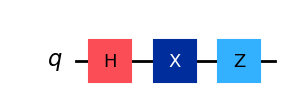

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)  # Süperpozisyon oluştur
qc.x(0)
qc.z(0)  # Diffusion operatörü (tek qubit için)
qc.draw('mpl')

Bu devre Grover’un difüzyon operatörünün (diffusion operator) temel bir bileşenidir.

Hadamard (H) → Süperpozisyon oluşturur.
X kapısı (NOT) → Qubit’i tersine çevirir.
Z kapısı → Fazı değiştirerek Grover’un algoritmasındaki difüzyon işlemini başlatır

2-Grover's Search One Qubit Representation:

{'1': 1024}


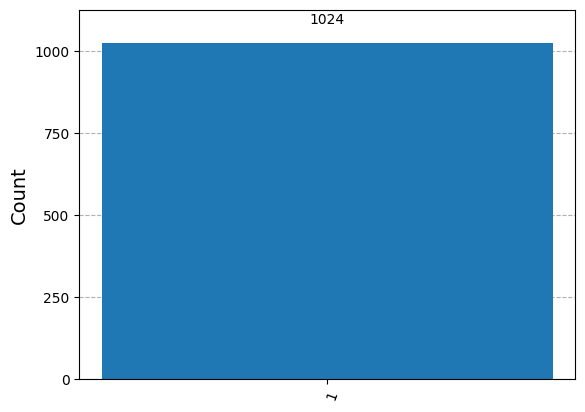

In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Kuantum devresi oluştur
qc = QuantumCircuit(1, 1)
qc.h(0)          # Süperpozisyon: |+⟩
qc.z(0)          # Oracle (|1⟩'i işaretle)
qc.h(0)          # Diffusion operatörü
qc.measure(0, 0)

# Simülasyon (AerSimulator)
simulator = AerSimulator()  # AerSimulator kullanımı
result = simulator.run(qc, shots=1024).result()  # Run fonksiyonu ile devreyi çalıştır

# Sonuçları al
counts = result.get_counts(qc)

# Çıktıyı yazdır
print(counts)

# Sonuçları histogram olarak görselleştir
plot_histogram(counts)


3-Grover's Search Implementation (2 Qubit ile):

{'11': 1024}


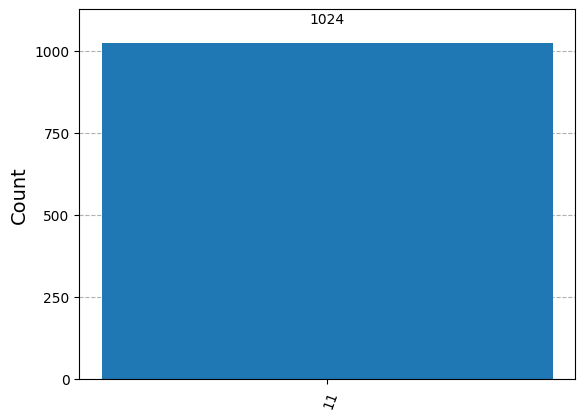

In [14]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 2 Qubit'li Kuantum devresi oluştur
qc = QuantumCircuit(2, 2)

# 1. Adım: Süperpozisyon oluştur (Hadamard)
qc.h([0, 1])  # Süperpozisyon: |++⟩

# 2. Adım: Oracle (|11⟩'i işaretle)
qc.cz(0, 1)   # İşaretlenmiş durum: |11⟩

# 3. Adım: Diffusion Operatörü
qc.h([0, 1])  # Hadamard kapıları
qc.z([0, 1])  # Z kapıları
qc.cz(0, 1)   # Oracle'ın tersine çevirme
qc.h([0, 1])  # Hadamard kapıları

# 4. Adım: Ölçüm
qc.measure([0, 1], [0, 1])  # Ölçüm işlemi

# Simülasyon (AerSimulator)
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()  # Simülasyonu çalıştır

# Sonuçları al
counts = result.get_counts(qc)

# Çıktıyı yazdır
print(counts)

# Sonuçları histogram olarak görselleştir
plot_histogram(counts)


Açıklamalar:
-Süperpozisyon: İki qubit üzerine Hadamard kapıları uygulanarak her iki qubit de süperpozisyon durumuna getirilir. Bu işlemle sistem, başlangıçta eşit olasılıklarla |00⟩, |01⟩, |10⟩ ve |11⟩ durumlarına geçer.
-Oracle: cz(0, 1) kapısı, sadece |11⟩ durumunu işaretler ve diğer durumları değiştirmez.
-Diffusion Operatörü: Bu adımda, hedef durumu (|11⟩) yüksek olasılıkla ölçmek için Devamlı Hadamard ve Z kapıları kullanılarak süperpozisyon tersine çevrilir.
-Ölçüm: Sonuçlar ölçülür ve klasik bitlerde gösterilir.